 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [119]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [120]:
# Reading whale returns
whale_returns_data = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [121]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [122]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [123]:
# Reading algorithmic returns
algo_returns_data = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head(10)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [124]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [125]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [126]:
# Reading S&P 500 Closing Prices
sp500_data = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [127]:
# Check Data Types
sp500_history_df.dtypes


Close    object
dtype: object

In [128]:
# Fix Data Types
sp500_history_df.dtypes
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df.head()
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')


/Users/milluminatillc/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [130]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change()
sp500_daily_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [131]:
# Drop nulls
sp500_daily_returns_df.isnull().sum()
sp500_daily_returns_df = sp500_daily_returns_df.dropna()
sp500_daily_returns_df.isnull().sum()

Close    0
dtype: int64

In [132]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df = sp500_daily_returns_df.rename(columns={"Close":"Sp500_Returns"})
sp500_daily_returns_df

,Sp500_Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [133]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.join=inner

combined_returns_df = pd.concat([whale_returns_df, algo_returns_df,sp500_daily_returns_df],axis='columns', join='inner')
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

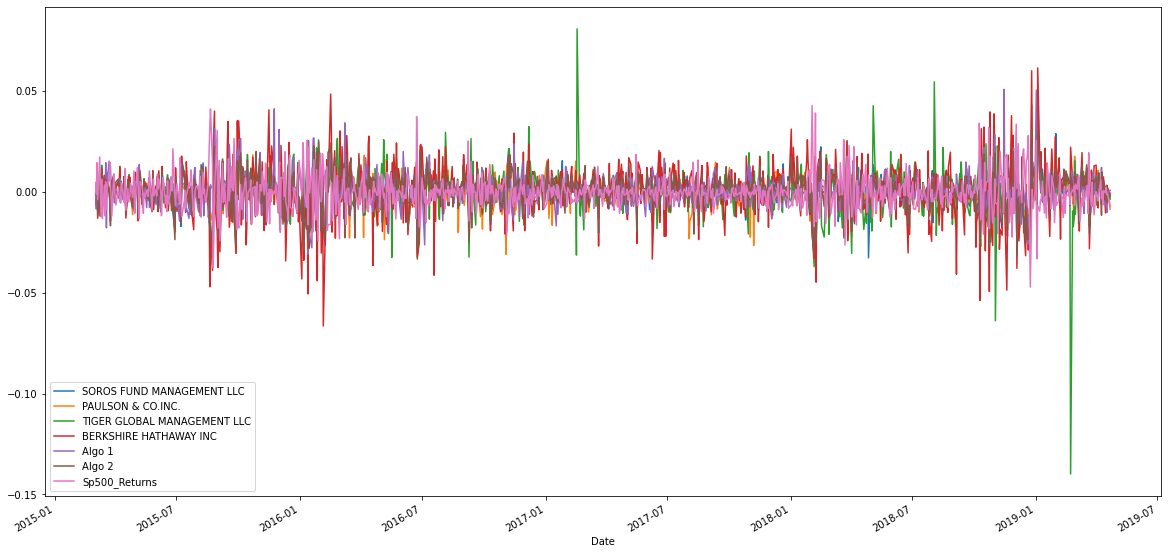

In [134]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

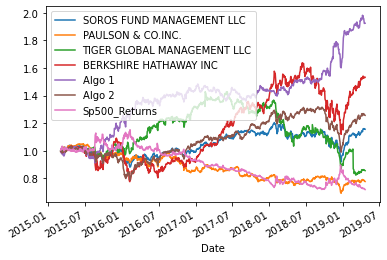

In [135]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1 + combined_returns_df).cumprod()

# Plot cumulative returns
combined_cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

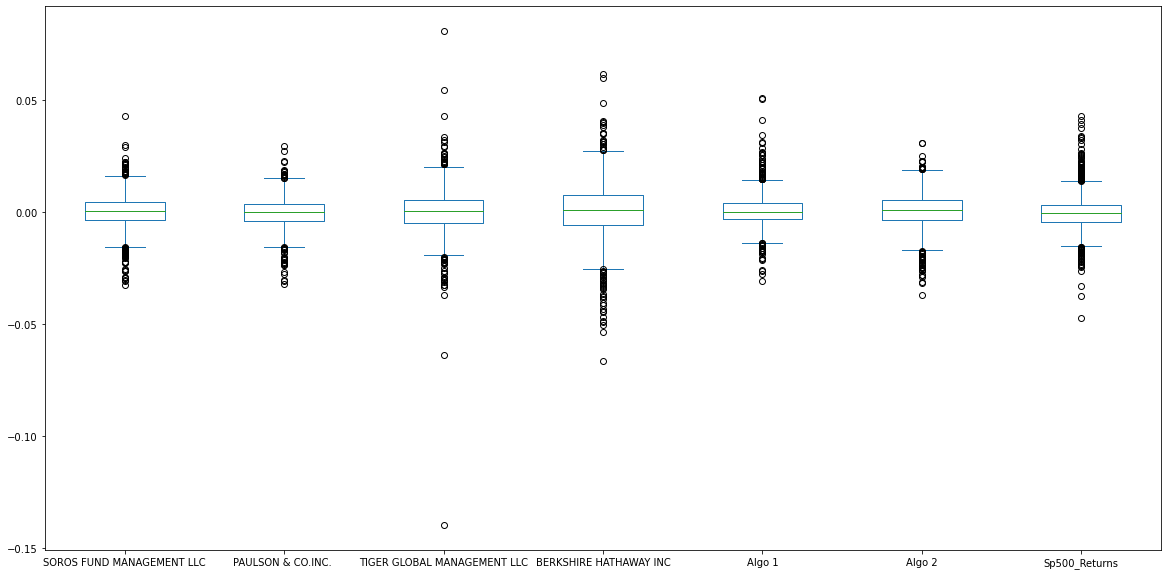

In [136]:
# Box plot to visually show risk
combined_returns_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [137]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns_df.std()
combined_returns_std


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Sp500_Returns                  0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [138]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns_std[-1]

# Determine which portfolios are riskier than the S&P 500
sp500_std < combined_returns_std


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
Sp500_Returns                  False
dtype: bool

### Calculate the Annualized Standard Deviation

In [139]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_returns_std*np.sqrt(252)
combined_annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
Sp500_Returns                  0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

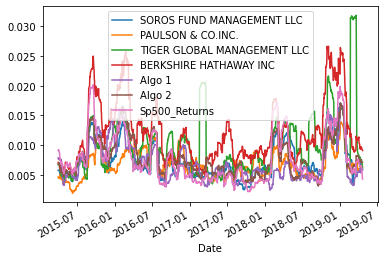

In [140]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_rolling_std.plot()

### Calculate and plot the correlation

In [141]:
# Calculate the correlation
combined_returns_correlation = combined_returns_df.corr()

# Display de correlation matrix
combined_returns_correlation.style.background_gradient(cmap='autumn')


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Sp500_Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

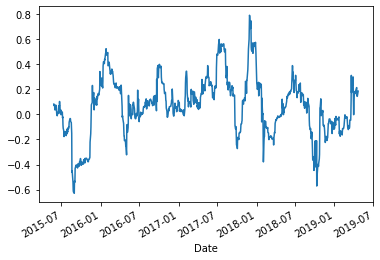

In [142]:
# Calculate covariance of a single portfolio
berkshire_covariance = combined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns_df['Sp500_Returns'])
# Calculate variance of S&P 500
sp500_rolling_var = combined_returns_df['Sp500_Returns'].rolling(window=60).var()
# Computing beta
berkshire_rolling_beta = berkshire_covariance/sp500_rolling_var
# Plot beta trend
berkshire_rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

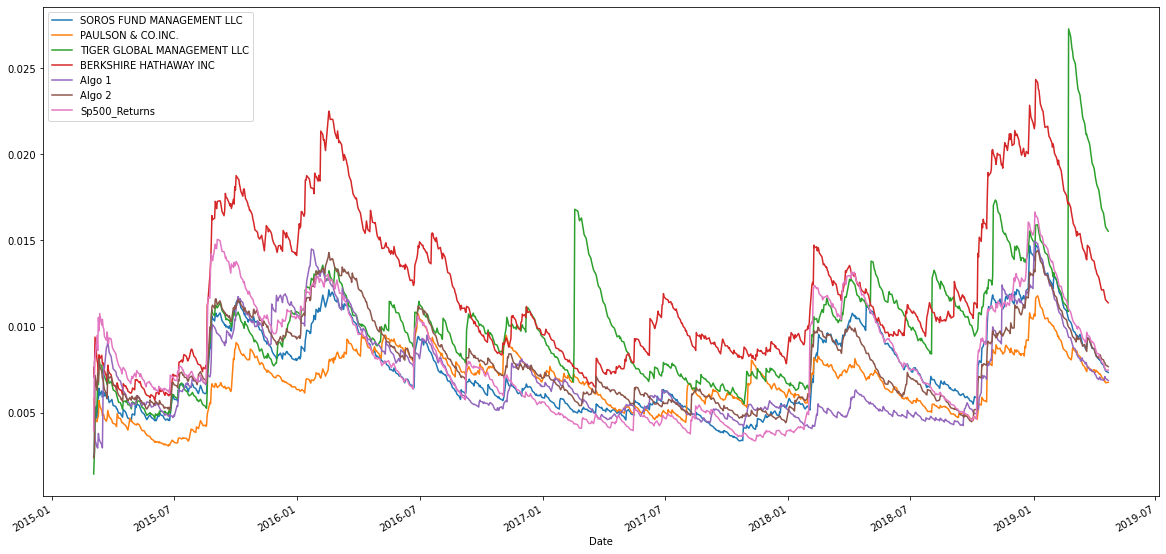

In [143]:
# Use `ewm` to calculate the rolling window df.ewm(21).std().plot
combined_ewm = combined_returns_df.ewm(halflife=21).std()
combined_ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [144]:
# Annualized Sharpe Ratios
combined_sharpe = (combined_returns_df.mean()*252)/(combined_returns_df.std()*np.sqrt(252))
combined_sharpe

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Sp500_Returns                 -0.518582
dtype: float64

<AxesSubplot:>

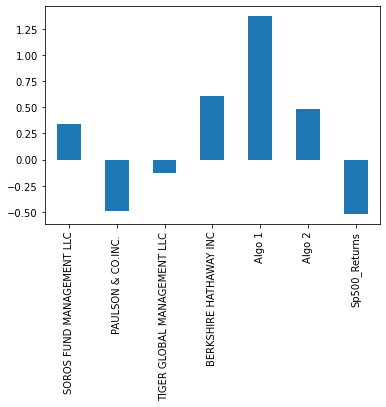

In [145]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [146]:
# Reading data from 1st stock
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


In [147]:
# Reading data from 2nd stock
cost_data = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


In [148]:
# Reading data from 3rd stock
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


In [149]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([aapl_df, cost_df, goog_df], axis=0, join='inner')
custom_portfolio

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [150]:
# Reset Date index
custom_portfolio = custom_portfolio.reset_index()
custom_portfolio


,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,GOOG,1078.59
746,2018-05-16,GOOG,1081.77
747,2018-05-15,GOOG,1079.23
748,2018-05-14,GOOG,1100.20


In [151]:
# Reorganize portfolio data by having a column per symbol
portfolio = custom_portfolio.pivot_table(values='NOCP',index='Trade DATE', columns='Symbol')

portfolio

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [161]:
# Calculate daily returns
portfolio_returns = portfolio.pct_change()
# Drop NAs
portfolio_returns.isnull().sum()
portfolio_returns.dropna()
# Display sample data
portfolio_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [162]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = portfolio_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [165]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df,sp500_daily_returns_df,portfolio_returns],axis='columns', join='inner')
combined_returns_df =combined_returns_df.rename(columns={0:'Portfolio Returns'})
combined_returns_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns,Portfolio Returns
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545


In [167]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df = combined_returns_df.dropna()
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns,Portfolio Returns
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [169]:
# Calculate the annualized `std`
combined_annualized_std = combined_returns_std*np.sqrt(252)
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns,Portfolio Returns
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

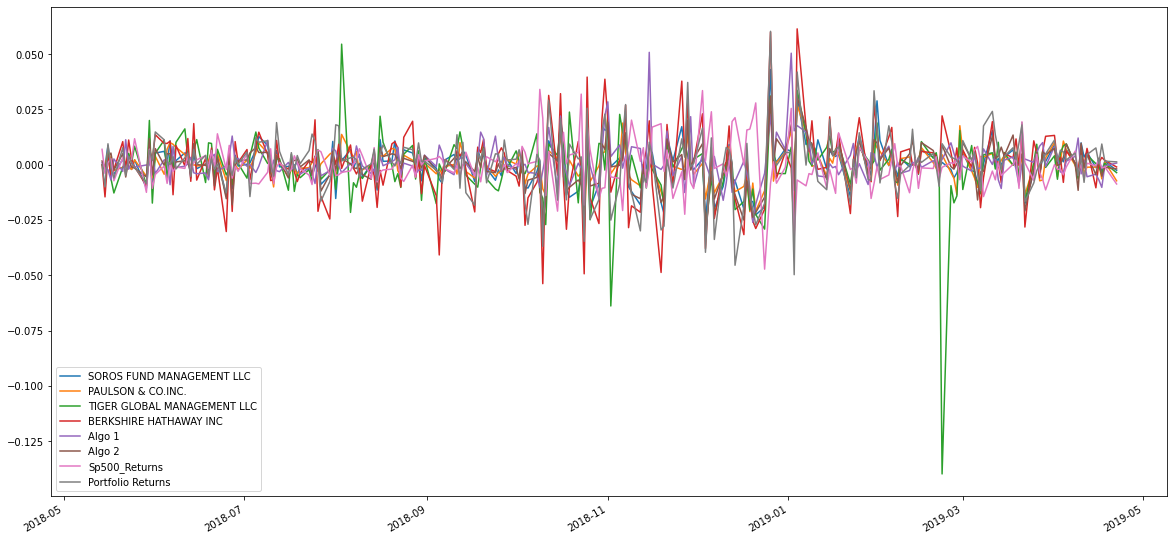

In [171]:
# Calculate rolling standard deviation
combined_rolling_std = combined_returns_df.rolling(window=21).std()

# Plot rolling standard deviation
combined_returns_df.plot(figsize=(20,10))

### Calculate and plot the correlation

In [172]:
# Calculate and plot the correlation
combined_returns_correlation = combined_returns_df.corr()

# Display de correlation matrix
combined_returns_correlation.style.background_gradient(cmap='autumn')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Returns,Portfolio Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
Sp500_Returns,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Portfolio Returns,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

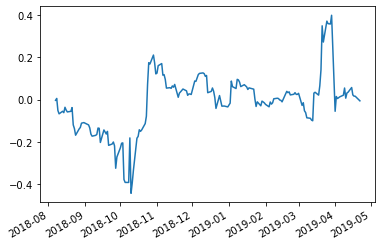

In [173]:
# Calculate and plot Beta
berkshire_covariance = combined_returns_df['Portfolio Returns'].rolling(window=60).cov(combined_returns_df['Sp500_Returns'])
# Calculate variance of S&P 500
sp500_rolling_var = combined_returns_df['Sp500_Returns'].rolling(window=60).var()
# Computing beta
berkshire_rolling_beta = berkshire_covariance/sp500_rolling_var
# Plot beta trend
berkshire_rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [174]:
# Calculate Annualized Sharpe Ratios
combined_sharpe = (combined_returns_df.mean()*252)/(combined_returns_df.std()*np.sqrt(252))
combined_sharpe

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
Sp500_Returns                 -0.427676
Portfolio Returns              0.876152
dtype: float64

<AxesSubplot:>

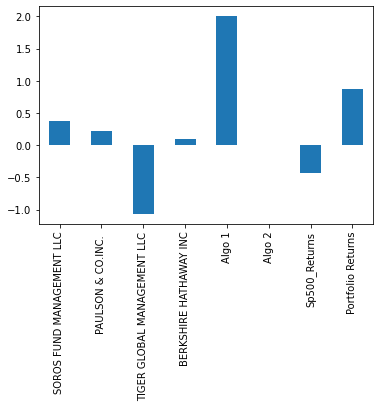

In [175]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe.plot.bar()

<AxesSubplot:>

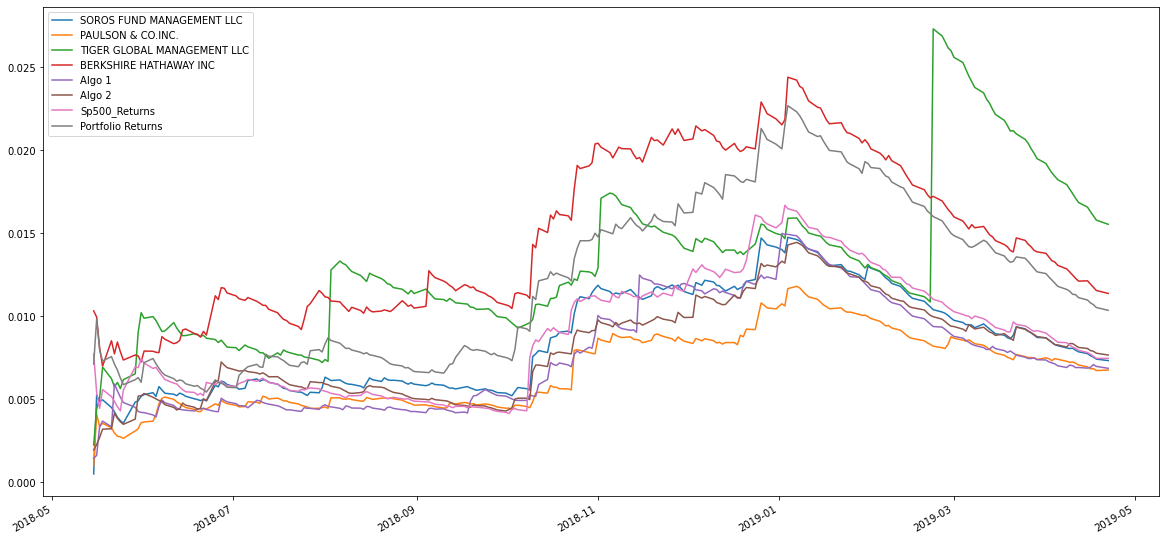

In [176]:
#Calculated the EWM for the new combined returns with the custom portfolio to see how it performed against others
combined_ewm = combined_returns_df.ewm(halflife=21).std()
combined_ewm.plot(figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [ ]:
#The custom portfolio does pretty well in terms of Sharpe ratio, coming in at second highest ratio. Which predicts its long term return should bring in at least the second best returns.
#In terms of EWM the custom portfolio came in 3rd slightly behind Berkshire Hathaway which is pretty impressive. Overall I believe the portfolio performed beautifully and may even out 
#perform Berkshire as time moves on. 